In [1]:
from scipy.integrate import simps
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa

In [3]:
# dimensionless lost circulation parameters
# Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group

Dimensionless_a = [0.0001,0.001,0.008]


In [4]:
f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

In [5]:
# calculation time step
# dynamic list append
Rad_d =  []
Time_d = []

In [6]:
for k,v in enumerate(Dimensionless_a):
    
    Radius_d_init = 1.1                            # the initial R_d
    Radius_d_alti = 1 + 1./v                       # the altimate R_d

    Radius_d = np.arange(Radius_d_init, Radius_d_alti)
    total_time_step = len(Radius_d)
    # calculation the time step matrices
    Rad_d.append(Radius_d)

In [7]:
for k,a in enumerate(Dimensionless_a):
    Y = [quad(f,1.01,int_val)[0] for int_val in Rad_d[k]]
    Time_d.append(Y)

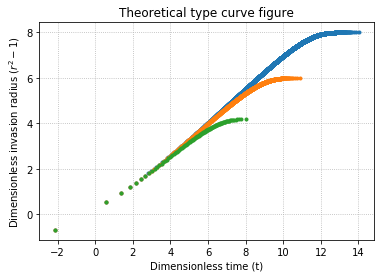

In [8]:
fig, ax3 = plt.subplots()
# plt.figure(figsize=(10,8))
for i in range(len(Dimensionless_a)):
    plt.plot(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1), '.')
    
plt.title('Theoretical type curve figure')
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Theoretical type curve

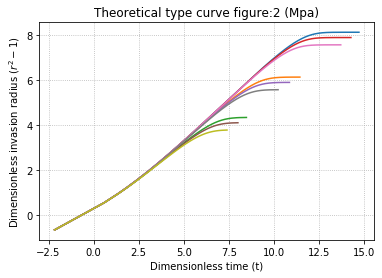

In [14]:
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 3.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

A = []
B = []

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []

    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    width = [0.00677, 0.000677, 0.000085]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);
        A.append(Radius_d)

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)
        B.append(Y)

# R_d = np.array(R_d)
# T_d = np.array(T_d)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

#plt.figure(figsize=(10,8))
figure, ax3 = plt.subplots()
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '-')

plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.ioff()

In [12]:
import sklearn
from sklearn.manifold import TSNE

In [18]:
A

[array([1.10000e+00, 2.10000e+00, 3.10000e+00, ..., 1.16621e+04,
        1.16631e+04, 1.16641e+04]),
 array([1.1000e+00, 2.1000e+00, 3.1000e+00, ..., 1.1651e+03, 1.1661e+03,
        1.1671e+03]),
 array([  1.1,   2.1,   3.1,   4.1,   5.1,   6.1,   7.1,   8.1,   9.1,
         10.1,  11.1,  12.1,  13.1,  14.1,  15.1,  16.1,  17.1,  18.1,
         19.1,  20.1,  21.1,  22.1,  23.1,  24.1,  25.1,  26.1,  27.1,
         28.1,  29.1,  30.1,  31.1,  32.1,  33.1,  34.1,  35.1,  36.1,
         37.1,  38.1,  39.1,  40.1,  41.1,  42.1,  43.1,  44.1,  45.1,
         46.1,  47.1,  48.1,  49.1,  50.1,  51.1,  52.1,  53.1,  54.1,
         55.1,  56.1,  57.1,  58.1,  59.1,  60.1,  61.1,  62.1,  63.1,
         64.1,  65.1,  66.1,  67.1,  68.1,  69.1,  70.1,  71.1,  72.1,
         73.1,  74.1,  75.1,  76.1,  77.1,  78.1,  79.1,  80.1,  81.1,
         82.1,  83.1,  84.1,  85.1,  86.1,  87.1,  88.1,  89.1,  90.1,
         91.1,  92.1,  93.1,  94.1,  95.1,  96.1,  97.1,  98.1,  99.1,
        100.1, 101.1, 1

In [21]:
data = pd.DataFrame()

for i in range(len(A)):
    if i == 0:
        data[i] = A[i]
    else:
        data[i] = pd.Series(A[i])
        
data.fillna(method = 'ffill', axis = 0, inplace = True)

In [23]:
Value = np.log10(data**2 - 1)

In [166]:
data = np.log(data)

In [54]:
c = np.array([])
for i in range(len(A)):
    c = np.vstack(A[i])
        

In [27]:
data.shape

(11664, 9)

In [28]:
AXI = np.log10(B[0])

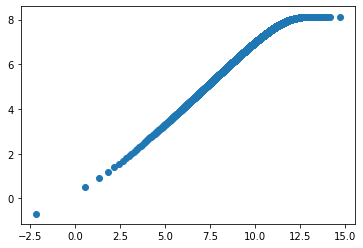

In [32]:
plt.scatter(AXI, Value[0])

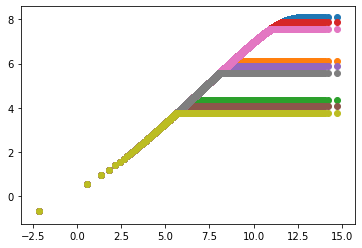

In [39]:
for i in range(9):

    plt.scatter(AXI, Value[i])

In [64]:
new = Value.set_index(AXI)


In [66]:
new['distance'] = AXI

In [74]:
XX = (new - new.shift(1)).dropna()

In [76]:
for i in range(9):
    XX[i]/=XX['distance']

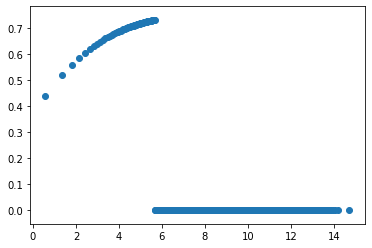

In [97]:
plt.scatter(XX.index, XX[8][:])

In [98]:
XX

,0,1,2,3,4,5,6,7,8,distance
0.581378,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,0.440743,2.746578
1.354035,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.520605,0.772656
1.824652,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.560814,0.470617
2.163848,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.587218,0.339196
2.428959,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.606218,0.265111
2.646438,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.620686,0.217479
2.830706,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.632150,0.184268
2.990497,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.641505,0.159791
3.131503,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.649315,0.141007
3.257643,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.655957,0.126140


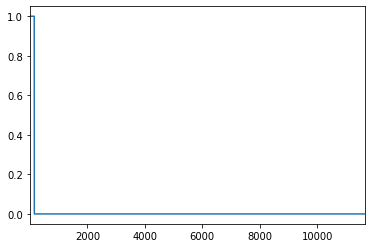

In [148]:
new[2].plot()

In [50]:
dig_proj = TSNE(random_state=1992093).fit_transform(Value[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.67778071  0.53275438  0.93500315 ...  8.13355352  8.133628
  8.13370247].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
dig_proj[98]

array([ 45.103195, -27.376621], dtype=float32)

In [142]:
len(new[0])

11663

In [143]:
len(new)

11663

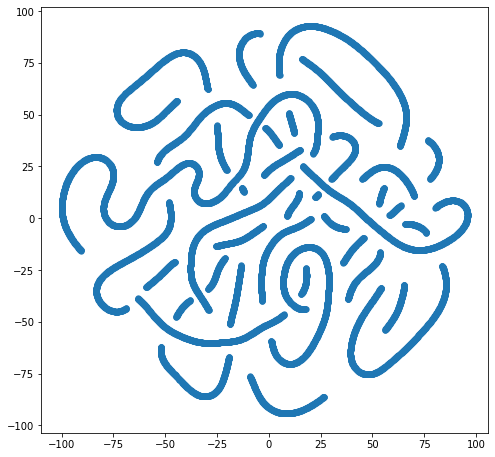

In [51]:
f = plt.figure(figsize=(8,8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(dig_proj[:,0], dig_proj[:,1], lw=0, s=40)

In [112]:
import seaborn as sns
palette = np.array(sns.color_palette('hls', 10))

In [103]:
P = np.arange(11664)

In [104]:
len(P)

11664